In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("sample_data.csv")

In [90]:
df['y_hat_20_03'] = 20 + 0.3*df['Marketing']

In [91]:
print(df[['Marketing', 'Profit', 'y_hat_20_03']])

    Marketing  Profit  y_hat_20_03
0         472     192        161.6
1         444     192        153.2
2         408     191        142.4
3         383     183        134.9
4         366     166        129.8
5         363     157        128.9
6         128     156         58.4
7         324     156        117.2
8         312     152        113.6
9         305     150        111.5
10        229     146         88.7
11        250     144         95.0
12        250     142         95.0
13        253     134         95.9
14        257     133         97.1
15        262     130         98.6
16        264     127         99.2
17        283     125        104.9
18        295     124        108.5
19          0     123         20.0
20        299     118        109.7
21        300     111        110.0
22        303     110        110.9
23        305     109        111.5
24        141     109         62.3
25        138     107         61.4
26        134     106         60.2
27        353     10

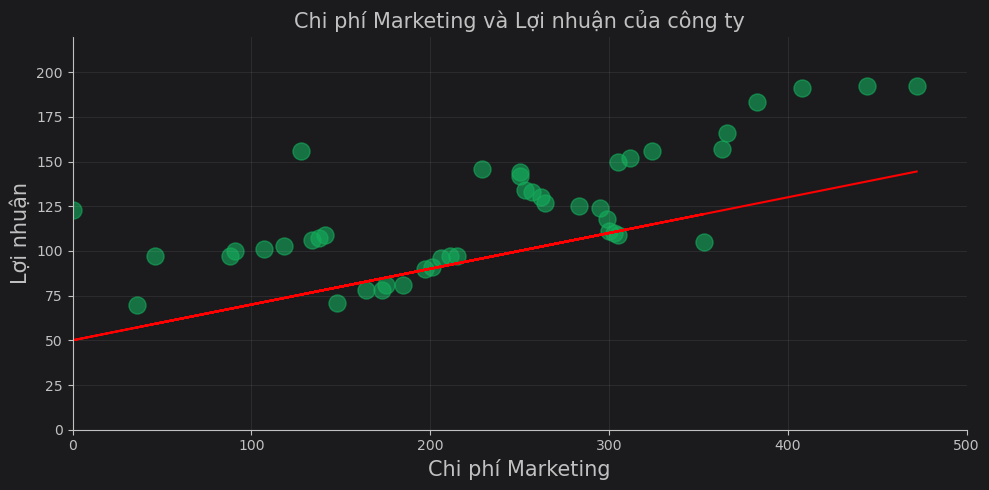

In [92]:
light_mode = False
background_color = 'white'  if light_mode else '#1B1B1E'
text_color = 'black'        if light_mode else '#C1C1C1'
color_text = 'light'        if light_mode else 'dark'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

plt.plot(
    df['Marketing'],
    50 + 0.2*df['Marketing'],
    color = 'red'
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)
plt.xlim([0, 500])

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)
plt.ylim([0, 220])

# Grid
plt.title("Chi phí Marketing và Lợi nhuận của công ty", fontsize=15, color=text_color)
plt.grid(c=text_color, alpha=0.1)
plt.tight_layout()

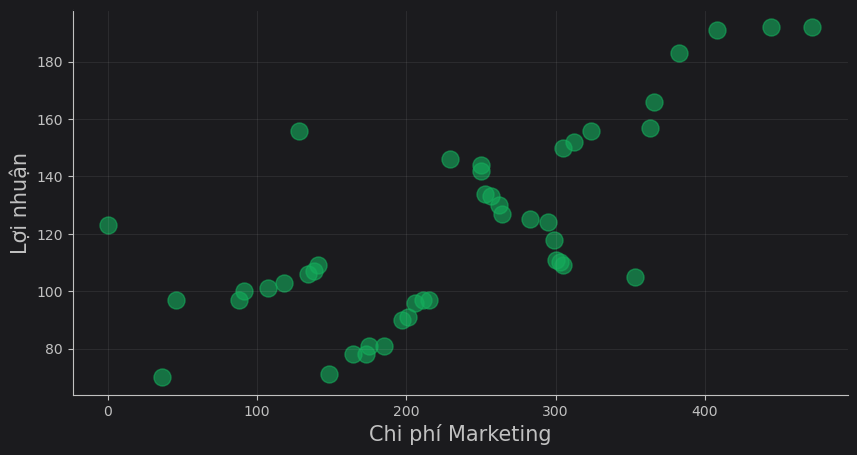

In [93]:
# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

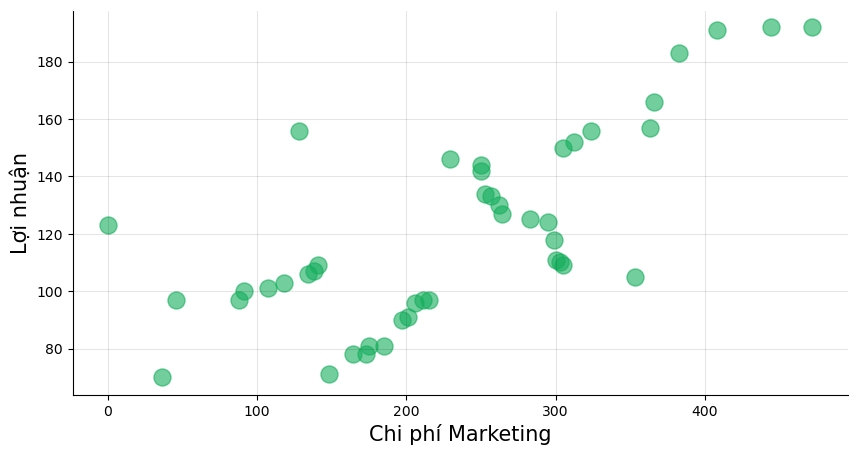

In [94]:
# Draw scatter plot
background_color = 'white'
text_color = 'black'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

In [95]:
def cost_function(marketing, profit, w0, w1):
    data_size = len(marketing)
    total_error = 0

    for i in range(data_size):
        total_error += (profit[i] - (w0 + w1*marketing[i]))**2

    return total_error / data_size

In [96]:
def gradient_descent(marketing, profit, w0_input, w1_input, learning_rate):
    w0_gradient = 0
    w1_gradient = 0
    data_size = len(marketing)

    # Tính tổng đạo hàm
    for i in range(data_size):
        # Đạo hàm w0
        w0_gradient += (w0_input + w1_input*marketing[i] - profit[i])

        # Đạo hàm w1
        w1_gradient += marketing[i]*(w0_input + w1_input*marketing[i] - profit[i])

    # Cập nhật giá trị tham số
    w0_new = w0_input - 2 * learning_rate * w0_gradient / data_size
    w1_new = w1_input - 2 * learning_rate * w1_gradient / data_size
    
    return w0_new, w1_new

In [97]:
def train(marketing, profit, w0, w1, learning_rate, loop_count):
    # Tính cost và in ra giá trị đầu vào
    cost = cost_function(marketing, profit, w0, w1)
    print(f"loop=0    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")
    
    # Lưu giá trị đầu vào
    w0_records = [w0]
    w1_records = [w1]
    cost_records = [cost]

    for loop in range(1, loop_count+1):
        # Cập nhật tham số
        w0, w1 = gradient_descent(marketing, profit, w0, w1, learning_rate)
        w0_records.append(w0)
        w1_records.append(w1)

        # Tính chi phí (độ sai lệch)
        cost = cost_function(marketing, profit, w0, w1)
        cost_records.append(cost)

        # In ra giá trị tại một số vòng lặp
        if (loop < 6) or (loop % 10 == 0):
            print(f"loop={loop}    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")

    return w0_records, w1_records, cost_records

In [98]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = 0, 
    learning_rate = 0.00001, 
    loop_count = 30
)

loop=0    w0=0.0000    w1=0.0000    cost=15733.8636
loop=1    w0=0.0024    w1=0.6114    cost=2735.1620
loop=2    w0=0.0020    w1=0.4252    cost=1529.4739
loop=3    w0=0.0025    w1=0.4819    cost=1417.6357
loop=4    w0=0.0027    w1=0.4646    cost=1407.2565
loop=5    w0=0.0029    w1=0.4699    cost=1406.2880
loop=10    w0=0.0042    w1=0.4687    cost=1406.1579
loop=20    w0=0.0067    w1=0.4687    cost=1406.0945
loop=30    w0=0.0092    w1=0.4686    cost=1406.0312


In [99]:
def draw_and_save_img(df, w0_records, w1_records, light_mode=True):

    background_color = 'white'  if light_mode else '#1B1B1E'
    text_color = 'black'        if light_mode else '#C1C1C1'
    color_text = 'light'        if light_mode else 'dark'

    for index, (w0, w1) in enumerate(zip(w0_records, w1_records)):
        # -------------------------------------------------------------
        # Update prediction
        df['prediction'] = w0 + w1*df['Marketing']

        # -------------------------------------------------------------
        # Create plots
        fig, axes = plt.subplots(
            nrows=1, ncols=2,
            figsize = (14, 5),
            facecolor = background_color  # Màu của bên trong chart
        )  
        fig.suptitle(f'Vòng lặp {index}', fontsize=20, color=text_color)    # Title chung

        # -------------------------------------------------------------
        # Plot points and trend line
        axes[0].scatter(x = df['Marketing'], y = df['Profit'], marker = 'o', color = '#14AE5C', alpha = 0.6, s = 150)
        axes[0].plot(df['Marketing'], df['prediction'], color = 'red')
        # X axis
        axes[0].set_xlabel("Chi phí Marketing", fontsize=15, color=text_color)
        axes[0].spines['bottom'].set_color(text_color)
        axes[0].spines['top'].set_color(background_color)
        axes[0].tick_params(axis='x', colors=text_color)
        axes[0].set_xlim([-1, 500])
        # Y axis
        axes[0].set_ylabel("Lợi nhuận", fontsize=15, color=text_color)
        axes[0].spines['left'].set_color(text_color)
        axes[0].spines['right'].set_color(background_color)
        axes[0].tick_params(axis='y', colors=text_color)
        axes[0].set_ylim([-1, 250])
        # Setting khác
        axes[0].set_facecolor(background_color)     # Màu của trục x y
        axes[0].grid(c=text_color, alpha=0.2)       # Grid
        axes[0].set_title(f'Phương trình dự đoán h(x) = {w0:.4f} + {w1:.4f}*Mkt', fontsize=15, color=text_color)    # Title

        # -------------------------------------------------------------
        # Plot cost function
        axes[1].plot(range(0, index+1), cost_record[:index+1], marker='o', color='red')
        # X axis
        axes[1].set_xlabel("Vòng lặp", fontsize=15, color=text_color)
        axes[1].spines['bottom'].set_color(text_color)
        axes[1].spines['top'].set_color(background_color)
        axes[1].tick_params(axis='x', colors=text_color)
        axes[1].set_xlim([-1, 32])
        # Y axis
        axes[1].set_ylabel("Độ lệch", fontsize=15, color=text_color)
        axes[1].spines['left'].set_color(text_color)
        axes[1].spines['right'].set_color(background_color)
        axes[1].tick_params(axis='y', colors=text_color)
        axes[1].set_ylim([-1, 17000])
        # Setting khác
        axes[1].set_facecolor(background_color)     # Màu của trục x y
        axes[1].grid(c=text_color, alpha=0.2)       # Grid
        axes[1].set_title(f'Tổng độ lệch (chi phí)', fontsize=15, color=text_color)

        # -------------------------------------------------------------
        # Save plot
        plt.tight_layout()
        plt.savefig(f'chart-{color_text}-{index:02}.png')
        plt.close(fig)

In [100]:
# draw_and_save_img(df, w0_records, w1_records, light_mode=False)
# draw_and_save_img(df, w0_records, w1_records, light_mode=True)

In [101]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 50, 
    w1 = 0.2, 
    learning_rate = 0.000015, 
    loop_count = 100
)

loop=0    w0=50.0000    w1=0.2000    cost=1138.4418
loop=1    w0=50.0007    w1=0.3786    cost=1092.5246
loop=2    w0=50.0002    w1=0.2077    cost=1050.4860
loop=3    w0=50.0009    w1=0.3713    cost=1011.9983
loop=4    w0=50.0005    w1=0.2148    cost=976.7616
loop=5    w0=50.0011    w1=0.3645    cost=944.5013
loop=10    w0=50.0012    w1=0.2326    cost=819.7526
loop=20    w0=50.0024    w1=0.2535    cost=687.8942
loop=30    w0=50.0035    w1=0.2670    cost=633.3347
loop=40    w0=50.0046    w1=0.2756    cost=610.7567
loop=50    w0=50.0057    w1=0.2812    cost=601.4106
loop=60    w0=50.0068    w1=0.2848    cost=597.5392
loop=70    w0=50.0079    w1=0.2871    cost=595.9328
loop=80    w0=50.0090    w1=0.2886    cost=595.2635
loop=90    w0=50.0101    w1=0.2895    cost=594.9819
loop=100    w0=50.0112    w1=0.2901    cost=594.8608


In [102]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record_original = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = -5, 
    learning_rate = 0.00001, 
    loop_count = 30
)

loop=0    w0=0.0000    w1=-5.0000    cost=1952111.1364
loop=1    w0=0.0256    w1=2.1341    cost=182341.6087
loop=2    w0=0.0181    w1=-0.0386    cost=18188.2957
loop=3    w0=0.0207    w1=0.6231    cost=2962.4039
loop=4    w0=0.0202    w1=0.4216    cost=1550.1348
loop=5    w0=0.0207    w1=0.4829    cost=1419.1354
loop=10    w0=0.0219    w1=0.4686    cost=1405.7115
loop=20    w0=0.0244    w1=0.4686    cost=1405.6480
loop=30    w0=0.0270    w1=0.4686    cost=1405.5847


In [48]:
def power_of_10_number(number):
    power = 0
    
    if abs(number) > 10:
        while abs(number) > 10:
            power += 1
            number /= 10
        return f"{number:.2f} * 10^{power}"
    
    if abs(number) < 1:
        while abs(number) < 1:
            power -= 1
            new_number = number * 10
            number = new_number
        return f"{number:.2f} * 10^({power})"

    return f"{number:.2f}"
    

In [74]:
def train(marketing, profit, w0, w1, learning_rate, loop_count):
    # Tính cost và in ra giá trị đầu vào
    cost = cost_function(marketing, profit, w0, w1)
    print(f"loop = 0  \t w0 = {power_of_10_number(w0)} \t w1 = {power_of_10_number(w1)} \t cost = {power_of_10_number(cost)}")
    
    # Lưu giá trị đầu vào
    w0_records = [w0]
    w1_records = [w1]
    cost_records = [cost]

    for loop in range(1, loop_count+1):
        # Cập nhật tham số
        w0, w1 = gradient_descent(marketing, profit, w0, w1, learning_rate)
        w0_records.append(w0)
        w1_records.append(w1)

        # Tính chi phí (độ sai lệch)
        cost = cost_function(marketing, profit, w0, w1)
        cost_records.append(cost)

        # In ra giá trị tại một số vòng lặp
        print(f"{loop} \t {power_of_10_number(w0)} \t {power_of_10_number(w1)} \t  {power_of_10_number(cost)}")

    return w0_records, w1_records, cost_records

In [39]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 50, 
    w1 = 0.2, 
    learning_rate = 0.00001, 
    loop_count = 30
)

loop=0  	 w0=5.00 * 10^1 	 w1=2.00 * 10^(-1) 	 cost=1.14 * 10^3
loop=1  	 w0=5.00 * 10^1 	 w1=3.19 * 10^(-1) 	 cost=6.45 * 10^2
loop=2  	 w0=5.00 * 10^1 	 w1=2.83 * 10^(-1) 	 cost=6.00 * 10^2
loop=3  	 w0=5.00 * 10^1 	 w1=2.94 * 10^(-1) 	 cost=5.95 * 10^2
loop=4  	 w0=5.00 * 10^1 	 w1=2.91 * 10^(-1) 	 cost=5.95 * 10^2
loop=5  	 w0=5.00 * 10^1 	 w1=2.92 * 10^(-1) 	 cost=5.95 * 10^2
loop=10  	 w0=5.00 * 10^1 	 w1=2.91 * 10^(-1) 	 cost=5.95 * 10^2
loop=20  	 w0=5.00 * 10^1 	 w1=2.91 * 10^(-1) 	 cost=5.95 * 10^2
loop=30  	 w0=5.00 * 10^1 	 w1=2.91 * 10^(-1) 	 cost=5.95 * 10^2


In [55]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 50, 
    w1 = 0.2, 
    learning_rate = 0.0001, 
    loop_count = 30
)

loop = 0  	 w0 = 5.00 * 10^1 	 w1 = 2.00 * 10^(-1) 	 cost = 1.14 * 10^3
1 	 5.00 * 10^1 	 1.39 	  7.95 * 10^4
2 	 5.00 * 10^1 	 -1.30 * 10^1 	  1.14 * 10^7
3 	 5.06 * 10^1 	 1.60 * 10^2 	  1.66 * 10^9
4 	 4.32 * 10^1 	 -1.92 * 10^3 	  2.41 * 10^11
5 	 1.32 * 10^2 	 2.32 * 10^4 	  3.50 * 10^13
6 	 -9.39 * 10^2 	 -2.79 * 10^5 	  5.07 * 10^15
7 	 1.20 * 10^4 	 3.36 * 10^6 	  7.36 * 10^17
8 	 -1.43 * 10^5 	 -4.05 * 10^7 	  1.07 * 10^20
9 	 1.73 * 10^6 	 4.87 * 10^8 	  1.55 * 10^22
10 	 -2.08 * 10^7 	 -5.87 * 10^9 	  2.25 * 10^24
11 	 2.51 * 10^8 	 7.07 * 10^10 	  3.26 * 10^26
12 	 -3.02 * 10^9 	 -8.52 * 10^11 	  4.73 * 10^28
13 	 3.64 * 10^10 	 1.03 * 10^13 	  6.87 * 10^30
14 	 -4.38 * 10^11 	 -1.24 * 10^14 	  9.96 * 10^32
15 	 5.28 * 10^12 	 1.49 * 10^15 	  1.45 * 10^35
16 	 -6.36 * 10^13 	 -1.79 * 10^16 	  2.10 * 10^37
17 	 7.66 * 10^14 	 2.16 * 10^17 	  3.04 * 10^39
18 	 -9.23 * 10^15 	 -2.60 * 10^18 	  4.42 * 10^41
19 	 1.11 * 10^17 	 3.13 * 10^19 	  6.41 * 10^43
20 	 -1.34 * 10^18 	 -

In [76]:
def train(marketing, profit, w0, w1, learning_rate, loop_count):
    # Tính cost và in ra giá trị đầu vào
    cost = cost_function(marketing, profit, w0, w1)
    print(f"loop = 0  \t w0 = {(w0)} \t w1 = {(w1)} \t cost = {(cost)}")
    
    # Lưu giá trị đầu vào
    w0_records = [w0]
    w1_records = [w1]
    cost_records = [cost]

    for loop in range(1, loop_count+1):
        # Cập nhật tham số
        w0, w1 = gradient_descent(marketing, profit, w0, w1, learning_rate)
        w0_records.append(w0)
        w1_records.append(w1)

        # Tính chi phí (độ sai lệch)
        cost = cost_function(marketing, profit, w0, w1)
        cost_records.append(cost)

        # In ra giá trị tại một số vòng lặp
        print(f"{loop} \t {(w0)} \t {(w1)} \t  {(cost)}")

    return w0_records, w1_records, cost_records

In [120]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record7 = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = -5, 
    learning_rate = 10**(-7), 
    loop_count = 30
)

loop=0    w0=0.0000    w1=-5.0000    cost=1952111.1364
loop=1    w0=0.0003    w1=-4.9287    cost=1901547.0515
loop=2    w0=0.0005    w1=-4.8582    cost=1852293.6343
loop=3    w0=0.0008    w1=-4.7888    cost=1804316.9113
loop=4    w0=0.0010    w1=-4.7202    cost=1757583.7892
loop=5    w0=0.0012    w1=-4.6525    cost=1712062.0328
loop=10    w0=0.0024    w1=-4.3270    cost=1501552.7937
loop=20    w0=0.0045    w1=-3.7369    cost=1155060.8177
loop=30    w0=0.0064    w1=-3.2194    cost=888598.7905


In [119]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record8 = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = -5, 
    learning_rate = 10**(-8), 
    loop_count = 30
)

loop=0    w0=0.0000    w1=-5.0000    cost=1952111.1364
loop=1    w0=0.0000    w1=-4.9929    cost=1947024.8493
loop=2    w0=0.0001    w1=-4.9857    cost=1941951.8243
loop=3    w0=0.0001    w1=-4.9786    cost=1936892.0268
loop=4    w0=0.0001    w1=-4.9715    cost=1931845.4222
loop=5    w0=0.0001    w1=-4.9644    cost=1926811.9762
loop=10    w0=0.0003    w1=-4.9291    cost=1901840.9268
loop=20    w0=0.0005    w1=-4.8591    cost=1852866.1943
loop=30    w0=0.0008    w1=-4.7900    cost=1805153.5540


In [118]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record5 = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = -5, 
    learning_rate = 10**(-5), 
    loop_count = 30
)

loop=0    w0=0.0000    w1=-5.0000    cost=1952111.1364
loop=1    w0=0.0256    w1=2.1341    cost=182341.6087
loop=2    w0=0.0181    w1=-0.0386    cost=18188.2957
loop=3    w0=0.0207    w1=0.6231    cost=2962.4039
loop=4    w0=0.0202    w1=0.4216    cost=1550.1348
loop=5    w0=0.0207    w1=0.4829    cost=1419.1354
loop=10    w0=0.0219    w1=0.4686    cost=1405.7115
loop=20    w0=0.0244    w1=0.4686    cost=1405.6480
loop=30    w0=0.0270    w1=0.4686    cost=1405.5847


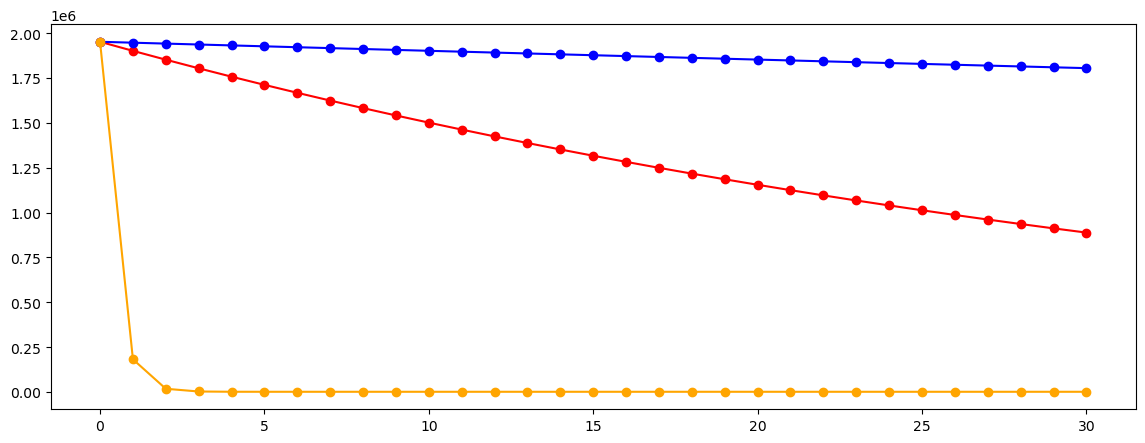

In [121]:

plt.subplots(
        figsize = (14, 5),
        facecolor = background_color
    )  
plt.plot(range(0, 31), cost_record7, marker='o', color='red')
plt.plot(range(0, 31), cost_record8, marker='o', color='blue')
plt.plot(range(0, 31), cost_record5, marker='o', color='orange')



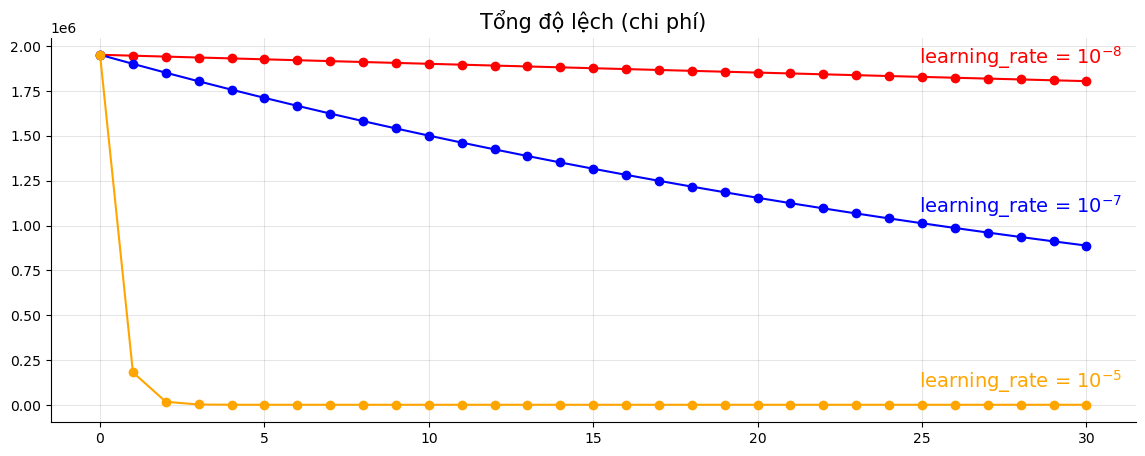

In [153]:
import matplotlib.pyplot as plt

light_mode = True
background_color = 'white'  if light_mode else '#1B1B1E'
text_color = 'black'        if light_mode else '#C1C1C1'
color_text = 'light'        if light_mode else 'dark'

# Plot
fig, ax = plt.subplots(
    figsize=(14, 5),
    facecolor=background_color
)
plt.plot(range(0, 31), cost_record8, marker='o', color='red')
plt.plot(range(0, 31), cost_record7, marker='o', color='blue')
plt.plot(range(0, 31), cost_record5, marker='o', color='orange')

# Text
plt.text(28, cost_record8[-1] + 130000, 'learning_rate = $10^{-8}$', color='red', verticalalignment='center', horizontalalignment='center', fontsize= 14)
plt.text(28, cost_record7[-1] + 220000, 'learning_rate = $10^{-7}$', color='blue', verticalalignment='center', horizontalalignment='center', fontsize= 14)
plt.text(28, cost_record5[-1] + 130000, 'learning_rate = $10^{-5}$', color='orange', verticalalignment='center', horizontalalignment='center', fontsize= 14)

# Color
ax.set_facecolor(background_color)     # Màu của trục x y
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
plt.grid(c=text_color, alpha=0.1)

# Show the plot
plt.title(f'Tổng độ lệch (chi phí)', fontsize=15, color=text_color)
plt.show()


In [84]:
def draw_and_save_img2(df, w0_records, w1_records, light_mode=True):

    background_color = 'white'  if light_mode else '#1B1B1E'
    text_color = 'black'        if light_mode else '#C1C1C1'
    color_text = 'light'        if light_mode else 'dark'

    # -------------------------------------------------------------
    # Create plots
    fig, axes = plt.subplots(
        figsize = (14, 5),
        facecolor = background_color  # Màu của bên trong chart
    )  

    # -------------------------------------------------------------
    # Plot cost function

    plt.plot(w0_records, w1_records, marker='o', color='red')
    # X axis
    plt.set_xlabel("Vòng lặp", fontsize=15, color=text_color)
    plt.spines['bottom'].set_color(text_color)
    plt.spines['top'].set_color(background_color)
    plt.tick_params(axis='x', colors=text_color)
    plt.set_xlim([-1, 32])
    # Y axis
    plt.set_ylabel("Độ lệch", fontsize=15, color=text_color)
    plt.spines['left'].set_color(text_color)
    plt.spines['right'].set_color(background_color)
    plt.tick_params(axis='y', colors=text_color)
    plt.set_ylim([-1, 17000])
    # Setting khác
    plt.set_facecolor(background_color)     # Màu của trục x y
    plt.grid(c=text_color, alpha=0.2)       # Grid
    plt.set_title(f'Tổng độ lệch (chi phí)', fontsize=15, color=text_color)

    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

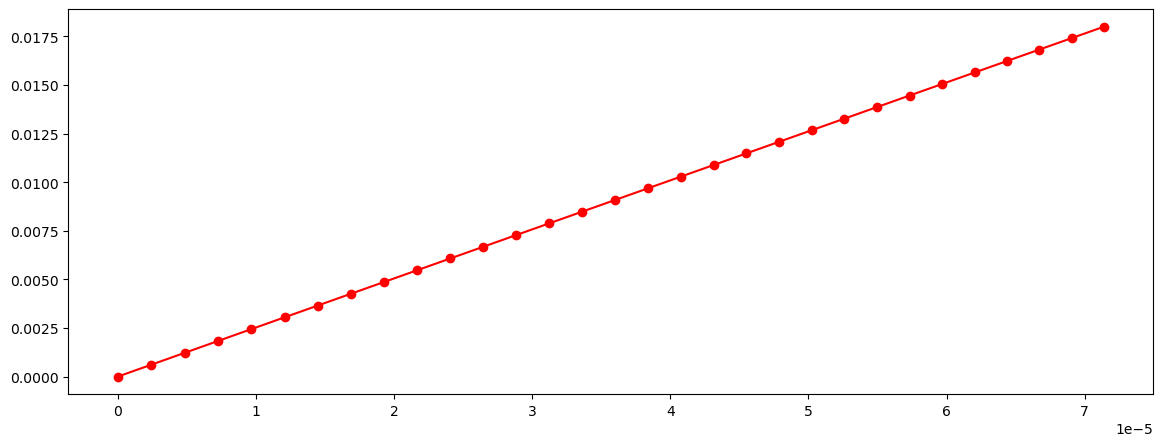

In [85]:
draw_and_save_img2(df, w0_records, w1_records, light_mode=True)

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


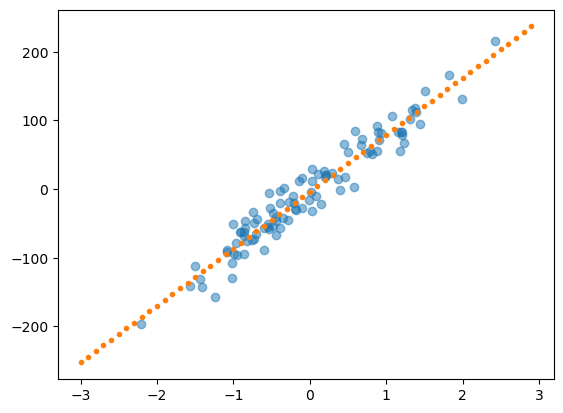

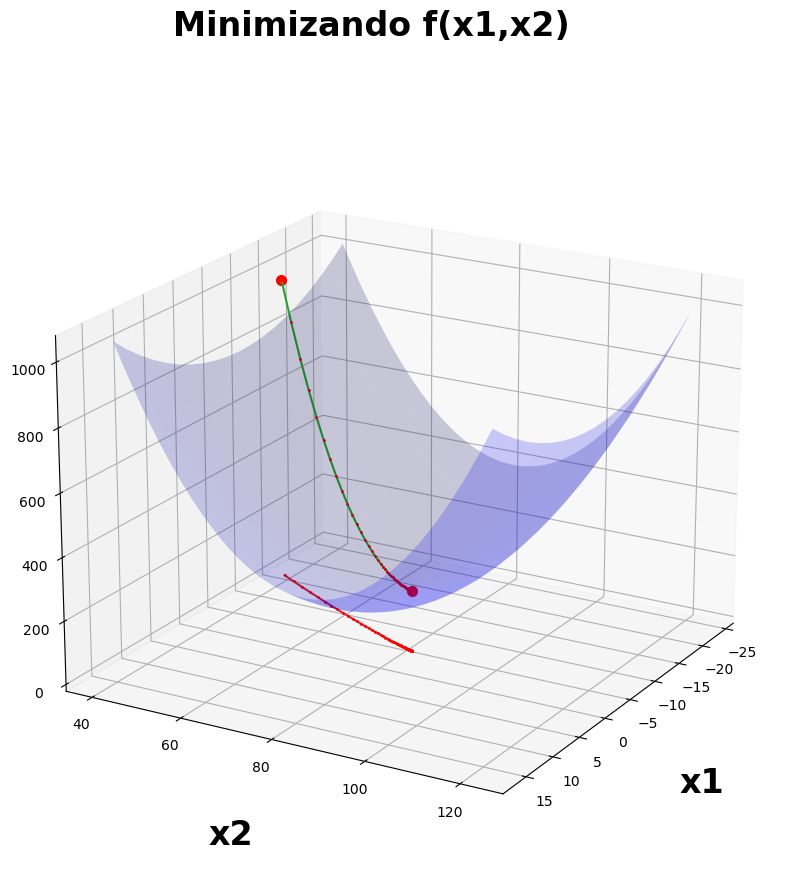

In [ ]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets import make_regression 

x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")